#  NLP Project 1 : Scraping, Text Preprocessing, Classification & Sentiment Analysis 

** *By Melany EBRAHIM and Sandra KEUTCHA* ** <br>
** *M1 Big Data & Machine Learning EFREI Paris - 2020-2021* **

In [ ]:
import os
from os import walk
from bs4 import BeautifulSoup
import requests
import pandas as pd

First of all, we begin by extracting data from website and putting it in "presidents-speeches" folder.

## Part A

We will apply text categorization techniques on the collected datasets. The input is the speeches of the presidents, the label is the name of the corresponding president.
The final goal is, given a presidential speech, to be able to identify who is the president that delivered the speech.


In [ ]:
data = pd.DataFrame(columns = ['president', 'speech'])

In [ ]:
from zipfile import ZipFile 
  
# spécifiant le nom du fichier zip
file = "presidents-speeches.zip"
  
# ouvrir le fichier zip en mode lecture
with ZipFile(file, 'r') as zip: 
    # afficher tout le contenu du fichier zip
    zip.printdir() 
  
    # extraire tous les fichiers
    print('extraction...') 
    zip.extractall() 
    print('Terminé!')

File Name                                             Modified             Size
presidents-speeches/                           2021-01-30 19:15:14            0
presidents-speeches/Andrew Jackson/            2021-01-30 19:15:14            0
presidents-speeches/Andrew Jackson/initial.txt 2021-01-26 18:57:54        13606
presidents-speeches/Andrew Jackson/speeches/   2021-01-31 22:55:28            0
presidents-speeches/Andrew Jackson/speeches/April 15, 1834__ProtestofSenateCensure.txt 2021-01-31 16:25:40        74968
presidents-speeches/Andrew Jackson/speeches/April 21, 1834__AddendumtotheProtestofSenateCensure.txt 2021-01-31 16:25:38         2726
presidents-speeches/Andrew Jackson/speeches/December 1, 1834__SixthAnnualMessagetoCongress.txt 2021-01-31 16:25:36        80166
presidents-speeches/Andrew Jackson/speeches/December 10, 1832__NullificationProclamation.txt 2021-01-31 16:25:50        51677
presidents-speeches/Andrew Jackson/speeches/December 12, 1833__MessageontheConstitutionalRigh

In [ ]:
path = "presidents-speeches/"
for (root, dirs, files) in os.walk(path):
    if len(files) > 1 :
        for file in files :
            speech = open(root + "/" + file, 'r').read()
            president = root.split("\\")[0].split("/")[1]
            data = data.append({"president" : president, "speech" : speech}, ignore_index=True)

In [ ]:
data.head()

president                                             speech
0  Ronald Reagan  b'Mr. Speaker, Mr. President, distinguished Me...
1  Ronald Reagan  b'\xc2\xa0 My fellow Americans: Some 2 months ...
2  Ronald Reagan  b'Good evening. As most of you know, I\'ve jus...
3  Ronald Reagan  b'Chairwoman Margaret Bush Wilson, I thank you...
4  Ronald Reagan  b"Well, thank you very much for that warm welc...

### 1. Apply all the necessary pre-processing techniques necessary for the task

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#### Data cleaning : to keep speech cleaner by removing the two first character (b')

In [ ]:
data.speech.head()

0    b'Mr. Speaker, Mr. President, distinguished Me...
1    b'\xc2\xa0 My fellow Americans: Some 2 months ...
2    b'Good evening. As most of you know, I\'ve jus...
3    b'Chairwoman Margaret Bush Wilson, I thank you...
4    b"Well, thank you very much for that warm welc...
Name: speech, dtype: object

In [ ]:
data.speech = data.speech.apply(lambda x : x[2:]) #apply transforme une serie en string

In [ ]:
data.speech.head()

0    Mr. Speaker, Mr. President, distinguished Memb...
1    \xc2\xa0 My fellow Americans: Some 2 months ag...
2    Good evening. As most of you know, I\'ve just ...
3    Chairwoman Margaret Bush Wilson, I thank you v...
4    Well, thank you very much for that warm welcom...
Name: speech, dtype: object

#### Tokenization : split speech by word to be able to apply additional features

In [ ]:
# Word Tokenization

from nltk.tokenize import word_tokenize

data_word_tokenized = word_tokenize(data.speech.to_string())
data_word_tokenized[:15]


['0',
 'Mr.',
 'Speaker',
 ',',
 'Mr.',
 'President',
 ',',
 'distinguished',
 'Memb',
 '...',
 '1',
 '\\xc2\\xa0',
 'My',
 'fellow',
 'Americans']

In [ ]:
# Remove "\\" from the speech to recognize each sentence

import re

regex = re.compile(r'[\\\n]')
data_clean = regex.sub(" ", data.speech[0])
data_clean

'Mr. Speaker, Mr. President, distinguished Members of the Congress, honored guests, and fellow citizens: I come before you to report on the state of our Union, and I \'m pleased to report that after four years of united effort, the American people have brought forth a nation renewed, stronger, freer, and more secure than before. Four years ago we began to change, forever I hope, our assumptions about government and its place in our lives. Out of that change has come great and robust growth-in our confidence, our economy, and our role in the world. Tonight America is stronger because of the values that we hold dear. We believe faith and freedom must be our guiding stars, for they show us truth, they make us brave, give us hope, and leave us wiser than we were. Our progress began not in Washington, DC, but in the hearts of our families, communities, workplaces, and voluntary groups which, together, are unleashing the invincible spirit of one great nation under God. Four years ago we said

In [ ]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize

data_clean_sent_tokenized = sent_tokenize(data_clean)
data_clean_sent_tokenized[:5]

["Mr. Speaker, Mr. President, distinguished Members of the Congress, honored guests, and fellow citizens: I come before you to report on the state of our Union, and I 'm pleased to report that after four years of united effort, the American people have brought forth a nation renewed, stronger, freer, and more secure than before.",
 'Four years ago we began to change, forever I hope, our assumptions about government and its place in our lives.',
 'Out of that change has come great and robust growth-in our confidence, our economy, and our role in the world.',
 'Tonight America is stronger because of the values that we hold dear.',
 'We believe faith and freedom must be our guiding stars, for they show us truth, they make us brave, give us hope, and leave us wiser than we were.']

#### Remove punctuations with lowercasing : keep only the content with words

In [ ]:
data_word_tokenized = [word.lower() for word in data_word_tokenized if word.isalpha()]
data_word_tokenized[:15]

['speaker',
 'president',
 'distinguished',
 'memb',
 'my',
 'fellow',
 'americans',
 'some',
 'months',
 'ag',
 'good',
 'evening',
 'as',
 'most',
 'of']

#### Removing stopwords : keep meaningful words to improve the model

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

data_word_tokenized = [word for word in data_word_tokenized if not word in stopwords.words('english')]
data_word_tokenized[:15]

['speaker',
 'president',
 'distinguished',
 'memb',
 'fellow',
 'americans',
 'months',
 'ag',
 'good',
 'evening',
 'know',
 'chairwoman',
 'margaret',
 'bush',
 'wilson']

#### Lemmatization / POS (Part Of Speech) tagging :
Lemmatization can make a model more general but also less precise because it will treat all
spelling variations of a given root word.
That's why we use POS tagging to help improve accuracy

In [ ]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk import word_tokenize, pos_tag

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    return ''
    
lemmatizer = WordNetLemmatizer()

data_word_lemmatized = []

for i, word in enumerate(data_word_tokenized):
    pos = get_wordnet_pos(pos_tag([word])[0][1])
    if pos != '':
        data_word_lemmatized.append(lemmatizer.lemmatize(word, pos))
    else:
        data_word_lemmatized.append(word)

data_word_lemmatized[:15]


['speaker',
 'president',
 'distinguish',
 'memb',
 'fellow',
 'american',
 'month',
 'ag',
 'good',
 'even',
 'know',
 'chairwoman',
 'margaret',
 'bush',
 'wilson']

In [ ]:
data.head()

president                                             speech
0  Ronald Reagan  Mr. Speaker, Mr. President, distinguished Memb...
1  Ronald Reagan  \xc2\xa0 My fellow Americans: Some 2 months ag...
2  Ronald Reagan  Good evening. As most of you know, I\'ve just ...
3  Ronald Reagan  Chairwoman Margaret Bush Wilson, I thank you v...
4  Ronald Reagan  Well, thank you very much for that warm welcom...

### 2. Split data into 80/20% groups of training/testing

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data[['president', 'speech']], test_size = 0.2)

In [ ]:
train.dropna(inplace=True)
train.reset_index(drop=True,inplace=True)
test.dropna(inplace=True)
test.reset_index(drop=True,inplace=True)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer #convertit un texte en une matrice de mots
count_vect = CountVectorizer()
count_vect.fit(train.speech.tolist())
X_train_vect = count_vect.transform(train.speech.tolist())

In [ ]:
X_ = X_train_vect.toarray()
y_ = train.president.tolist() #affiche le nom de tous les presidents

### 3. Model

#### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_ = KNeighborsClassifier(n_neighbors=4, weights='distance') #parameter tweaking c'est changé n_neighbors
clf_.fit(X_, y_)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
from sklearn.metrics import accuracy_score

x_test_vect = count_vect.transform(test.speech.tolist())
x_test = x_test_vect.toarray()
y_test = test.president.tolist()

predictions = clf_.predict(x_test)

print(accuracy_score(y_test, predictions))

0.6623376623376623


#### Naives Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

y_test = test.president.tolist()

y_pred = gnb.fit(X_, y_).predict(x_test)

print(accuracy_score(y_test, y_pred))

0.6493506493506493


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_, y_)
x_test_vect = count_vect.transform(test.speech.tolist())
x_test = x_test_vect.toarray()

y_pred = model.predict(x_test)

print(fbeta_score(y_test, y_pred,average="micro",beta = 0.5)) #beta dermines the weight of recall in the combined score


0.7142857142857143


### 3. Perform parameter tweeking to maximize the accuracy of your model

#### KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_ = KNeighborsClassifier(n_neighbors=2, weights='distance') #parameter tweaking c'est changé n_neighbors
clf_.fit(X_, y_)

KNeighborsClassifier(n_neighbors=2, weights='distance')

In [ ]:
from sklearn.metrics import accuracy_score

x_test_vect = count_vect.transform(test.speech.tolist())
x_test = x_test_vect.toarray()
y_test = test.president.tolist()

predictions = clf_.predict(x_test)

print(accuracy_score(y_test, predictions))

0.6753246753246753


We notice that when we decrease the number of n_neighbors for example 2, we obtain a best accuracy score 

#### Naives Bayes

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_, y_)
x_test_vect = count_vect.transform(test.speech.tolist())
x_test = x_test_vect.toarray()

y_pred = model.predict(x_test)

print(fbeta_score(y_test, y_pred,average="micro",beta = 0.1)) #beta dermines the weight of recall in the combined score
print(fbeta_score(y_test, y_pred,average="macro",beta = 0.1))
print(fbeta_score(y_test, y_pred,average="weighted",beta = 0.1))

0.7142857142857142
0.6682324785816405
0.7206922638748426


## Part B

We will apply sentiment analysis on the datasets provided using a pre-trained sentiment analysis model from NLTK called VADER

### 1. Order the presidents in chronological order, from oldest to newest. 

In [ ]:
df = pd.DataFrame(columns =['presidents','year'])

In [ ]:
path = "presidents-speeches/"
for (root, dirs, files) in os.walk(path):
    if len(files) > 1 :
        for file in files :
            year = file
            div = file.split("__")
            year = div[0]
            presidents = root.split("\\")[0].split("/")[1]
            df = df.append({"presidents" : presidents, "year" : year}, ignore_index=True)

In [ ]:
df.head()

presidents               year
0  Ronald Reagan   February 6, 1985
1  Ronald Reagan   October 27, 1983
2  Ronald Reagan   October 13, 1986
3  Ronald Reagan      June 29, 1981
4  Ronald Reagan  December 16, 1988

In [ ]:
# supprimer les doublons
df.drop_duplicates(subset='presidents', keep = 'first', inplace=True) 

In [ ]:
df['year'] = pd.to_datetime(df['year'])

In [ ]:
df = df.sort_values(by = "year")

In [ ]:
df.head(12)

presidents       year
60       George Washington 1790-12-29
180       Thomas Jefferson 1803-12-17
205         Andrew Jackson 1833-01-16
130  Franklin D. Roosevelt 1944-06-12
270       Richard M. Nixon 1971-02-25
0            Ronald Reagan 1985-02-06
83       George H. W. Bush 1992-10-11
231           Bill Clinton 1998-03-25
344         George W. Bush 2005-08-31
294           Barack Obama 2009-12-10
107           Donald Trump 2018-01-26

### 2. Order each of their speeches in chronological order, from oldest to newest. 

In [ ]:
dfs = pd.DataFrame(columns =['presidents','year', 'speech'])

In [ ]:
path = "presidents-speeches/"
for (root, dirs, files) in os.walk(path):
    if len(files) > 1 :
        for file in files :
            speech = open(root + "/" + file, 'r').read() #Verifie ton .read()
            year = file
            div = file.split("__")
            year = div[0]
            presidents = root.split("\\")[0].split("/")[1]
            dfs = dfs.append({"presidents" : presidents, "year" : year, "speech" : speech}, ignore_index=True)

In [ ]:
dfs.speech = dfs.speech.apply(lambda x : x[2:])

In [ ]:
# Remove "\\" from the speech to recognize each sentence

import re

regex = re.compile(r'[\\\n]')
data_clean = regex.sub(" ", dfs.speech[0])
data_clean

'Mr. Speaker, Mr. President, distinguished Members of the Congress, honored guests, and fellow citizens: I come before you to report on the state of our Union, and I \'m pleased to report that after four years of united effort, the American people have brought forth a nation renewed, stronger, freer, and more secure than before. Four years ago we began to change, forever I hope, our assumptions about government and its place in our lives. Out of that change has come great and robust growth-in our confidence, our economy, and our role in the world. Tonight America is stronger because of the values that we hold dear. We believe faith and freedom must be our guiding stars, for they show us truth, they make us brave, give us hope, and leave us wiser than we were. Our progress began not in Washington, DC, but in the hearts of our families, communities, workplaces, and voluntary groups which, together, are unleashing the invincible spirit of one great nation under God. Four years ago we said

In [ ]:
# Sentence tokenization

from nltk.tokenize import sent_tokenize

data_clean_sent_tokenized = sent_tokenize(data_clean)
data_clean_sent_tokenized[:5]

["Mr. Speaker, Mr. President, distinguished Members of the Congress, honored guests, and fellow citizens: I come before you to report on the state of our Union, and I 'm pleased to report that after four years of united effort, the American people have brought forth a nation renewed, stronger, freer, and more secure than before.",
 'Four years ago we began to change, forever I hope, our assumptions about government and its place in our lives.',
 'Out of that change has come great and robust growth-in our confidence, our economy, and our role in the world.',
 'Tonight America is stronger because of the values that we hold dear.',
 'We believe faith and freedom must be our guiding stars, for they show us truth, they make us brave, give us hope, and leave us wiser than we were.']

In [ ]:
dfs['year'] = pd.to_datetime(dfs['year'])

In [ ]:
dfs = dfs.sort_values(by = "year")

In [ ]:
dfs

presidents       year  \
61   George Washington 1789-04-30   
80   George Washington 1789-10-03   
70   George Washington 1790-01-08   
73   George Washington 1790-12-08   
60   George Washington 1790-12-29   
..                 ...        ...   
128       Donald Trump 2019-09-24   
126       Donald Trump 2019-09-25   
122       Donald Trump 2019-10-27   
125       Donald Trump 2020-01-03   
120       Donald Trump 2020-01-08   

                                                speech  
61   Fellow Citizens of the Senate and the House of...  
80   Whereas it is the duty of all Nations to ackno...  
70   Fellow Citizens of the Senate and House of Rep...  
73    Fellow citizens of the Senate and House of Re...  
60    I the President of the United States, by my o...  
..                                                 ...  
128  PRESIDENT TRUMP:\xc2\xa0 Thank you very much.\...  
126  PRESIDENT TRUMP:\xc2\xa0 Thank you very much.\...  
122  Last night, the United States brought the worl...  
125  Hello, everybody.\xc2\xa0Well, thank you very ...  
120  As long as I am President of the United States...  

[384 rows x 3 columns]

### 3. Run the VADER sentiment analyzer on the processed speeches and extract the sentiment of every speech


Note: capital letters, exclamation marks, smileys, more prominent terms increase the positive or negative score

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [ ]:
dfs['neg'] = dfs['speech'].apply(lambda x:analyser.polarity_scores(x)['neg'])
dfs['neu'] = dfs['speech'].apply(lambda x:analyser.polarity_scores(x)['neu'])
dfs['pos'] = dfs['speech'].apply(lambda x:analyser.polarity_scores(x)['pos'])
dfs['compound'] = dfs['speech'].apply(lambda x:analyser.polarity_scores(x)['compound'])
dfs.head(10)

presidents       year  \
61  George Washington 1789-04-30   
80  George Washington 1789-10-03   
70  George Washington 1790-01-08   
73  George Washington 1790-12-08   
60  George Washington 1790-12-29   
68  George Washington 1791-10-25   
64  George Washington 1792-04-05   
67  George Washington 1792-11-06   
78  George Washington 1792-12-12   
77  George Washington 1793-03-04   

                                               speech    neg    neu    pos  \
61  Fellow Citizens of the Senate and the House of...  0.046  0.719  0.235   
80  Whereas it is the duty of all Nations to ackno...  0.011  0.699  0.290   
70  Fellow Citizens of the Senate and House of Rep...  0.033  0.722  0.246   
73   Fellow citizens of the Senate and House of Re...  0.050  0.751  0.198   
60   I the President of the United States, by my o...  0.089  0.717  0.194   
68   I meet you, upon the present occasion, with t...  0.041  0.785  0.174   
64   Gentlemen of the House of Representatives: I ...  0.026  0.894  0.080   
67   Fellow-Citizens of the Senate, and of the Hou...  0.058  0.812  0.129   
78   Whereas I have received authentic information...  0.088  0.683  0.230   
77  Fellow-Citizens:\n\nI am again called upon by ...  0.033  0.886  0.081   

    compound  
61    0.9999  
80    0.9993  
70    0.9997  
73    0.9998  
60    0.9995  
68    0.9999  
64    0.7906  
67    0.9996  
78    0.9885  
77    0.7845

In [ ]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [ ]:
# analyse sentiment of each sentence of the speech

for i in range(len(data_clean_sent_tokenized)):
    sentiment_analyzer_scores(data_clean_sent_tokenized[i])

Mr. Speaker, Mr. President, distinguished Members of the Congress, honored guests, and fellow citizens: I come before you to report on the state of our Union, and I 'm pleased to report that after four years of united effort, the American people have brought forth a nation renewed, stronger, freer, and more secure than before. {'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.9422}
Four years ago we began to change, forever I hope, our assumptions about government and its place in our lives. {'neg': 0.0, 'neu': 0.868, 'pos': 0.132, 'compound': 0.4404}
Out of that change has come great and robust growth-in our confidence, our economy, and our role in the world. {'neg': 0.0, 'neu': 0.634, 'pos': 0.366, 'compound': 0.8689}
Tonight America is stronger because of the values that we hold dear. {'neg': 0.0, 'neu': 0.533, 'pos': 0.467, 'compound': 0.7845}
We believe faith and freedom must be our guiding stars, for they show us truth, they make us brave, give us hope, and leave us wiser th

In [ ]:
df_sent = pd.DataFrame({'sent_speech' : data_clean_sent_tokenized})

In [ ]:
df_sent['neg'] = df_sent['sent_speech'].apply(lambda x:analyser.polarity_scores(x)['neg'])
df_sent['neu'] = df_sent['sent_speech'].apply(lambda x:analyser.polarity_scores(x)['neu'])
df_sent['pos'] = df_sent['sent_speech'].apply(lambda x:analyser.polarity_scores(x)['pos'])
df_sent['compound'] = df_sent['sent_speech'].apply(lambda x:analyser.polarity_scores(x)['compound'])
df_sent.head()

sent_speech    neg    neu    pos  \
0  Mr. Speaker, Mr. President, distinguished Memb...  0.000  0.744  0.256   
1  Four years ago we began to change, forever I h...  0.000  0.868  0.132   
2  Out of that change has come great and robust g...  0.000  0.634  0.366   
3  Tonight America is stronger because of the val...  0.000  0.533  0.467   
4  We believe faith and freedom must be our guidi...  0.029  0.537  0.434   

   compound  
0    0.9422  
1    0.4404  
2    0.8689  
3    0.7845  
4    0.9485

### 4. Count the number of negative speeches vs the number of positive speeches for every president
 The sentiment of a speech is the overall sentiment of the sentences; For example, if 60% of the sentences are positive and 40% are negative, then the speech has a positive sentiment.

In [ ]:
# fct pour compter le nb de pos et neg speeche

def compt_president(president):
    cpt_pos = 0
    cpt_neg = 0
    for index, row in dfs.iterrows():
        if row.compound > 0 and row.presidents == president:
            cpt_pos = cpt_pos + 1
        elif row.presidents == president :
            cpt_neg = cpt_neg + 1

    print("Number of positive speech of" ,president ," : ", cpt_pos)
    print("Number of negative speech of" ,president ," : ", cpt_neg)

    return cpt_pos, cpt_neg

In [ ]:
def compt_each_pres():
    for i in df.presidents:
        cpt = compt_president(i)

In [ ]:
compt_each_pres()

Number of positive speech of George Washington  :  22
Number of negative speech of George Washington  :  1
Number of positive speech of Thomas Jefferson  :  25
Number of negative speech of Thomas Jefferson  :  0
Number of positive speech of Andrew Jackson  :  26
Number of negative speech of Andrew Jackson  :  0
Number of positive speech of Franklin D. Roosevelt  :  44
Number of negative speech of Franklin D. Roosevelt  :  6
Number of positive speech of Richard M. Nixon  :  22
Number of negative speech of Richard M. Nixon  :  2
Number of positive speech of Ronald Reagan  :  57
Number of negative speech of Ronald Reagan  :  3
Number of positive speech of George H. W. Bush  :  24
Number of negative speech of George H. W. Bush  :  0
Number of positive speech of Bill Clinton  :  37
Number of negative speech of Bill Clinton  :  2
Number of positive speech of George W. Bush  :  34
Number of negative speech of George W. Bush  :  6
Number of positive speech of Barack Obama  :  49
Number of nega

In [ ]:
# function which counts the total number of pos and neg speeches

def compt():
    cpt_pos = 0
    cpt_neg = 0
    for i in dfs.compound:
        if i > 0:
            cpt_pos = cpt_pos + 1
        else :
            cpt_neg = cpt_neg + 1
    
    print("Total number of positive speeches : ", cpt_pos)
    print("Total number of negative speeches : ", cpt_neg)
    
compt()

Total number of positive speeches :  360
Total number of negative speeches :  24


In [ ]:
df_presi = pd.DataFrame(columns =['presidents','positive_speech', 'negative_speech'])

In [ ]:
for i in df.presidents: 
    cpt_pos = 0
    cpt_neg = 0
    for index, row in dfs.iterrows():
        if row.compound > 0 and row.presidents == i:
            cpt_pos = cpt_pos + 1
        elif row.compound < 0 and row.presidents == i :
            cpt_neg = cpt_neg + 1
    df_presi = df_presi.append({"presidents" : i, 'positive_speech': cpt_pos, 'negative_speech': cpt_neg}, ignore_index=True)
df_presi

presidents positive_speech negative_speech
0       George Washington              22               0
1        Thomas Jefferson              25               0
2          Andrew Jackson              26               0
3   Franklin D. Roosevelt              44               6
4        Richard M. Nixon              22               2
5           Ronald Reagan              57               3
6       George H. W. Bush              24               0
7            Bill Clinton              37               2
8          George W. Bush              34               6
9            Barack Obama              49               1
10           Donald Trump              20               3

### Use a graph to visualize the sentiment of every president over his presidential period

presidents
Andrew Jackson           AxesSubplot(0.125,0.2;0.775x0.68)
Barack Obama             AxesSubplot(0.125,0.2;0.775x0.68)
Bill Clinton             AxesSubplot(0.125,0.2;0.775x0.68)
Donald Trump             AxesSubplot(0.125,0.2;0.775x0.68)
Franklin D. Roosevelt    AxesSubplot(0.125,0.2;0.775x0.68)
George H. W. Bush        AxesSubplot(0.125,0.2;0.775x0.68)
George W. Bush           AxesSubplot(0.125,0.2;0.775x0.68)
George Washington        AxesSubplot(0.125,0.2;0.775x0.68)
Richard M. Nixon         AxesSubplot(0.125,0.2;0.775x0.68)
Ronald Reagan            AxesSubplot(0.125,0.2;0.775x0.68)
Thomas Jefferson         AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object


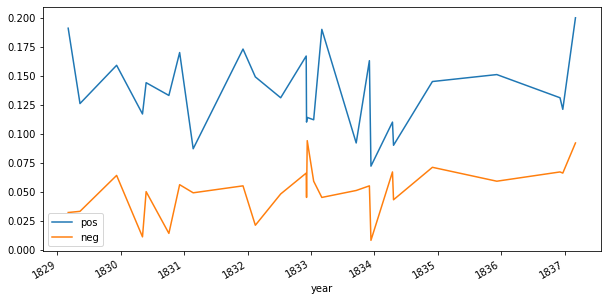

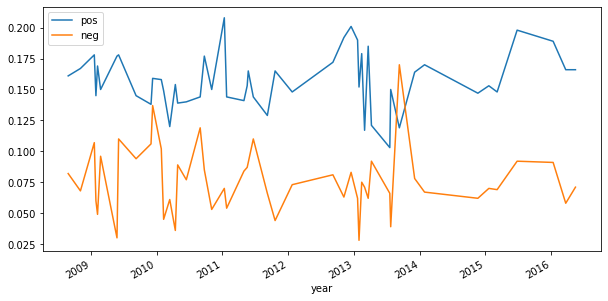

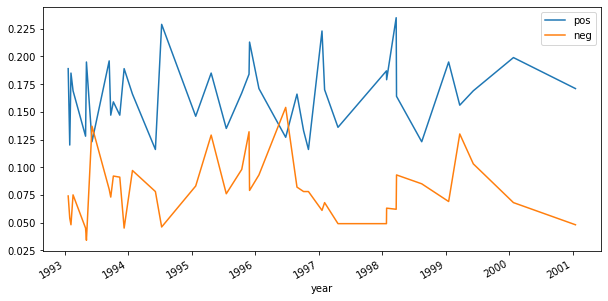

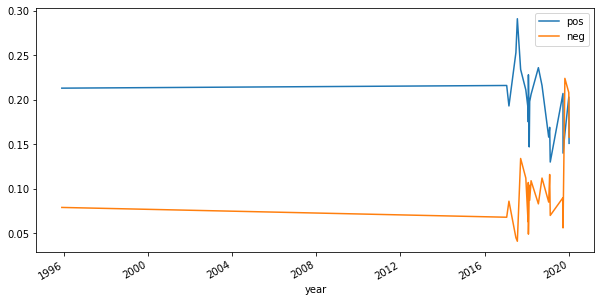

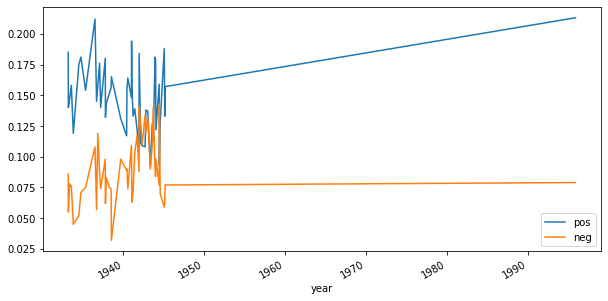

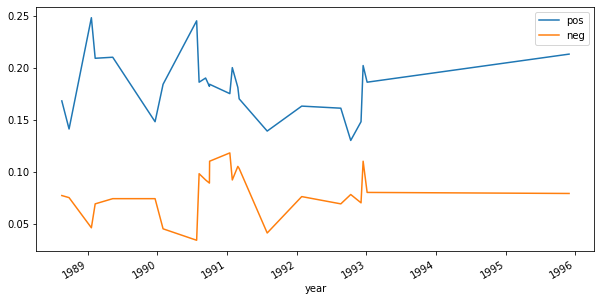

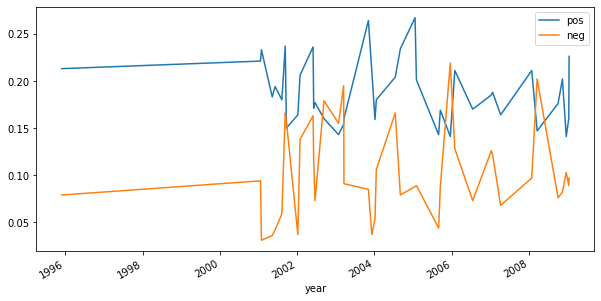

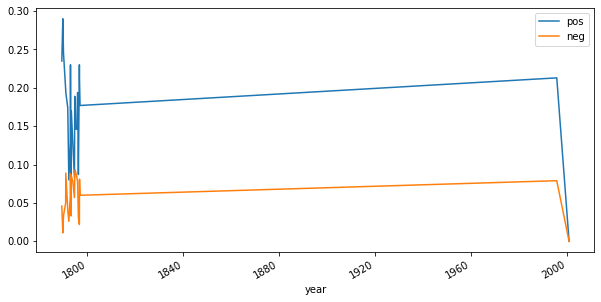

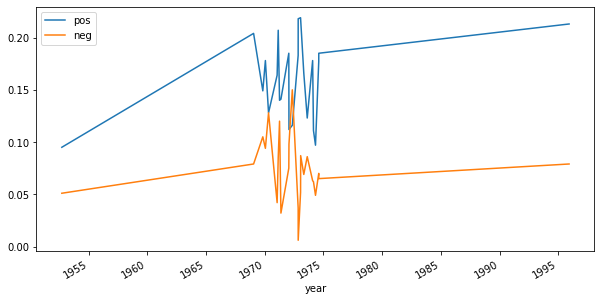

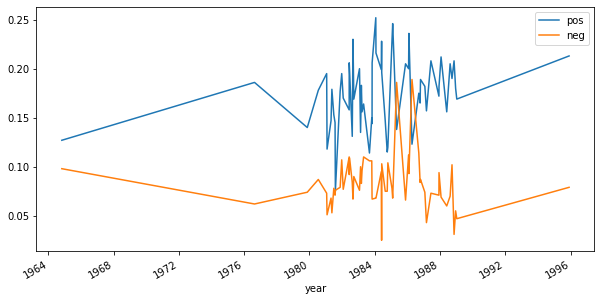

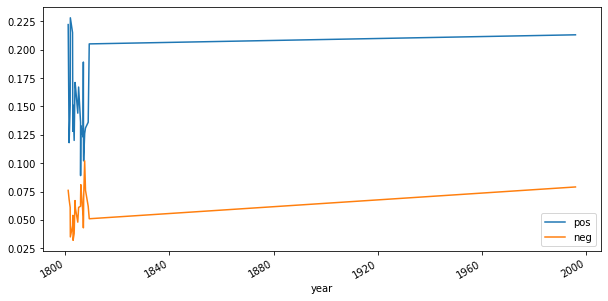

In [ ]:
# the following graphics are sorted according to the order of the list of presidents displayed
import matplotlib.pyplot as plt

senti = dfs.groupby('presidents').plot(x="year", y=["pos", "neg"], figsize=(10, 5))
print(senti)

### Visualize the overall sentiments of all presidential speeches in one graph, which can help us see the overall centemental change of US president speeches over the years

<function matplotlib.pyplot.show(close=None, block=None)>

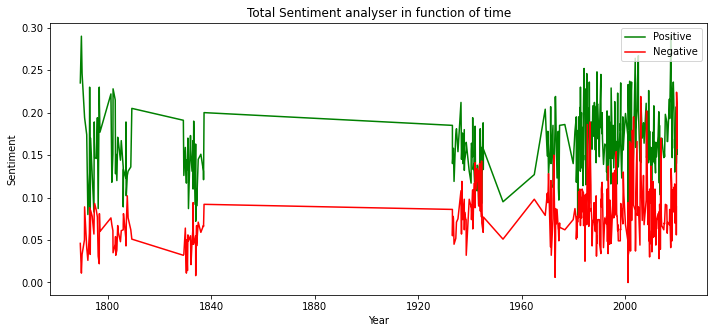

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40, 5))
y = dfs.year
plt.subplot(131)
plt.plot(y, dfs.pos, c = "g", label = "Positive")
plt.plot(y, dfs.neg, c = "r", label = "Negative")
plt.xlabel('Year')
plt.ylabel('Sentiment')
plt.legend(loc = "upper right")
plt.title('Total Sentiment analyser in function of time')
plt.show

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=360d8f73-77b2-46f0-9284-d25154822a20' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>